<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Copy_of_multinomial_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multinomial Regression model
## Import required libraries
* This cell imports essential libraries for:
  * **Data Handling**: `numpy` (numerical computing), `pandas` (data manipulation)
  * **Dataset generation**: `make_classification` (synthetic data creation).
  * **Data splitting**: `train_test_split` (train-test split).
  * **Model training**: `LogisticRegression` (mutinomial logistic regression model).
  * **Performance metrics**: `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `log_loss`, `classifiation_report` (detailed classification metrics), `roc_curve`, `auc`(ROC-AUC evaluation).
  * **Data Preprocessing**: `label_binarize` (multi-class target encoding for ROC curve).
  * **Visualization**: `matplotlib.pyplot`, `seaborn` (Plotting confusion matrix & ROC curve).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, log_loss, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

## Defining dataset parameters

In [ ]:
n_samples=1000 # The dataset will contain 1,000 instances (rows)
n_classes=3 #There will be three classes (multiclass classification)
n_features=5 #Each instance will have 5 features (predictors)

## Generating a synthetic multiclass dataset
* The use of `make_classification()` makes it useful for model testing since it simulates real-world datasets.
* It allows for control of feature importance, redudancy, and class distribution.

In [ ]:
X, y =make_classification(
    n_samples=n_samples, #Generates 1,000 data points
    n_classes=n_classes, # Creates 3 distinct classes (multiclass problem)
    n_features=n_features, # Each sample has 5 features
    n_informative=4, #Out of 5 features, 4 contribute useful information for classification
    n_redundant=0, #No redudant features (i.e., no duplicate/linear combinations)
    n_clusters_per_class=1, #Each class has one cluster of points
    random_state=42 #Ensures reproducibility of the dataset
)

## Splitting the dataset
* This step divides the dataset into training and testing sets.
* `train_test_split(X, y, test_size=0.2, random_state=42)`
  * 80% of the data is used for training the model (`X_train`, `y_train`).
  *20% is kept for testing the model (`X_test`, `y_test`).
  * `random_state=42` ensures results are reproducible.

* Splitting the dataset ensures that the model prevents overfitting by testing on unseen data, ensures the model's generalization to new data, and maintains class distribution in training and test sets.

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Multinomial Logistic Regression model
* Multinomial Logistic Regression is used since:
  * Suitable for multi-class classification problems (when `n_classes>2`).
  *Computes probabilities for each class insted of using a one-vs-rest approach.
  * Works well when features are linearly separable in higher-dimensional space.

In [ ]:
model=LogisticRegression(
    multi_class='multinomial', # Specifies that the model should perform multinomial classification (used when tere are more than two classes)
    solver='lbfgs', #Uses the LBFGS (Limited-memory BFGS) optimization algorithm, which is efficient for small-to-medium datasets.
    max_iter=1000, #Increases the maximum iterations to 1,000 to ensure the solver converges
    random_state=42 #Ensures consistent results.
)
model.fit(X_train, y_train) #Trains the model on the training data

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

## Making predictions with the trained model
* After training the Multinomial Logistic Regression model, we use it to make predictions on the test data.
* `model.predict(X_test)`:
  * Generates the predicted class labels for the test set.
  * Each instance is assigned the most probable class based ont he model.

* `model.predict_proba(X_test)`
  * Returns the probabilities of each class for each test sample.
  * The output is a matrix, where each row contains probabilities for all classes.
  * The class with the highest probability is the final prediction.

In [ ]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

## Evaluating the model's performance
* These metrics help assess how wel the model performes
1. **Confusion matrix**(`conf_matrix`):
  * Displays the true vs. predicted class labels.
  * Helps visualize misclassifications across different categories.

2. **Accuracy**(`accuracy`)
  * Measures the proportion of correcty predicted instances.
  * Formula:
  
   $ \text{Accuracy}=\frac{\text{Correct Predictions}}{\text{Total Predictions}} $
  * Works well when class distributions are balanced

3. **Precision**(`precision`)(weighted average)
  * The ratio of correctly predicted positive observations to total predicted positives.
  * Formula:

    $ \text{Precision}=\frac{\text{True Positives}}{\text{True Positives + False Positives}} $
  * `average='weighted'` ensures it accounts for class imbalance.

4. **Recall** (`recall`) (Weighted average)
  * The proportion of actual positives correctly identified.
  * Formula: $ \text{Recall}=\frac{\text{True Positives}}{\text{True Positives + False Negatives}} $
  * Measures how well the model captures all positive cases.

5. **F1 Score** (`f1`) (Weighted average)
  * The harmonic mean of precision and recall
  * Formula: $ F1=2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision}+ \text{Recall}} $
  * Useful when classes are imbalanced.

6. **Log loss** (`logloss`)
  * Measures the uncertainty in the predicted probabilities.
  * Formula: $ \text{Log Loss}=-\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{ij} \log(\hat{p}_{ij}) $
  * Lower values indicate better probability calibration.

In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')
logloss=log_loss(y_test, y_pred_proba)

## Print the model evaluation metrics

In [ ]:
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")


Model Evaluation Metrics:
Accuracy: 0.7850
Precision: 0.7861
Recall: 0.7850
F1 Score: 0.7849
Log Loss: 0.6132


## Confusion matrix visualization

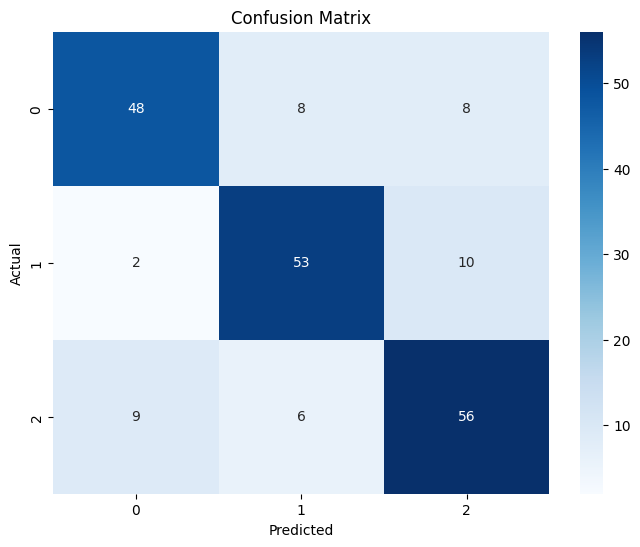

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature importance visualization
* This cell computes and visualizes the importance of each feature in the multinomial logistic regression model using the absolute values of the model's coefficients.
* This helps interpret which features influence model predictions the most.
* Useful for feature selection and model refinemnet in future iterations.

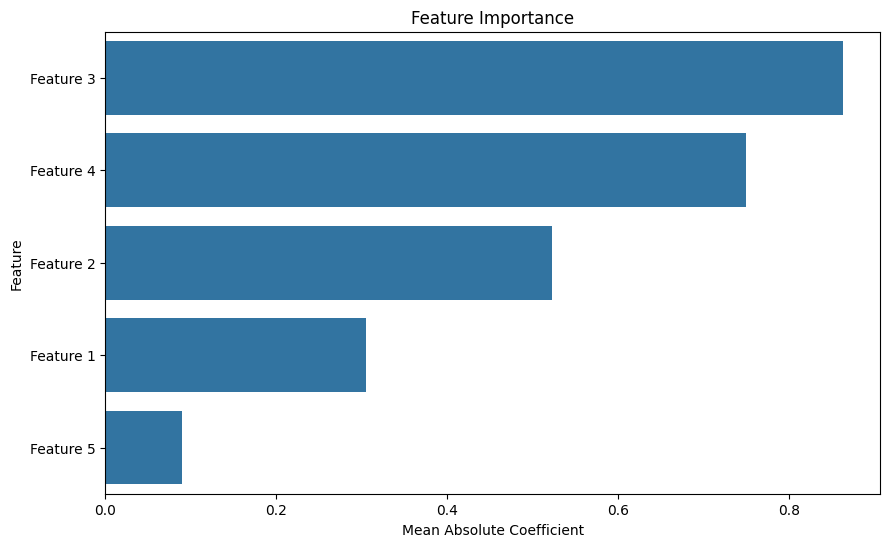

In [ ]:
feature_importance=pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(n_features)],
    'Coefficient': np.mean(np.abs(model.coef_), axis=0)
})
feature_importance=feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Mean Absolute Coefficient')
plt.show()

## Binarizing labels and predicting probabilities
* This cell prepares the true labels for multi-class evaluation and computes the predicted probabilities.

1. **Binarizing True labels (`y_test_bin`):
  * `label_binarize(y_test, classes=range(n_classes))`
  * Converts the multi-class labels (`y_test`) into a binary format, where each class is represented as a separate column.
  * Essential for multi-class ROC and AUC calculations.

2. **Predicting class probabilities** (`y_pred_proba`).
* `model.predict_proba(X_test)`
* Outputs a probability distribution across all possible classes for each test sample.
* Used to evaluate performance using metrics like log loss and ROC curves.

* Binarized labels allow us to compute one-vs-rest(OvR) ROC curves.
* Predicted probabilities provide more granular insights than hard predictions.

In [ ]:
y_test_bin=label_binarize(y_test, classes=range(n_classes))
y_pred_proba=model.predict_proba(X_test)

## Multi-class ROC curve visualization
* The cell generates Receiever Operating Characteristic (ROC) curves for a multinomial logistic regression model using OvR classification.

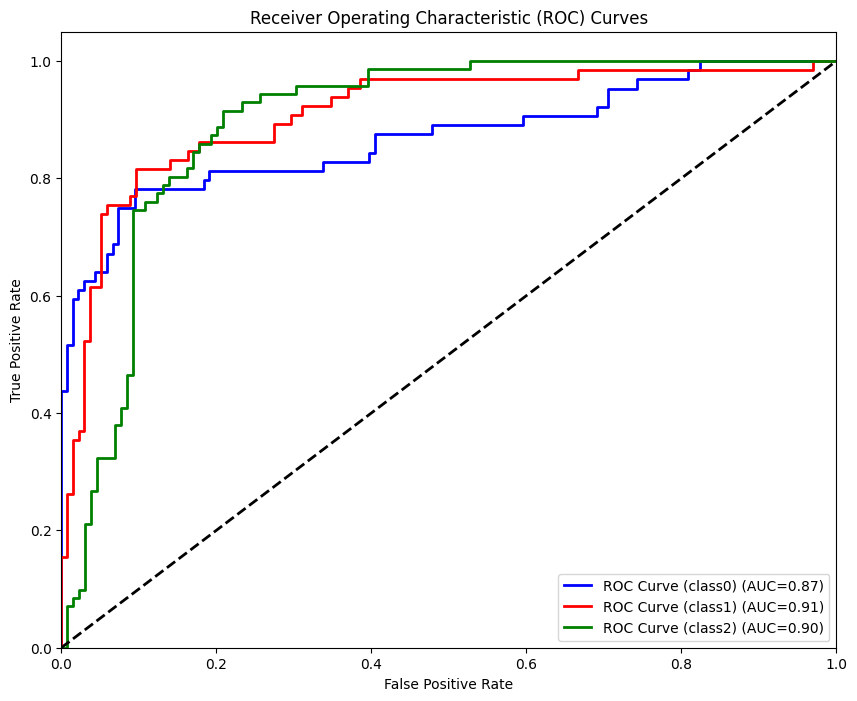

In [ ]:
plt.figure(figsize=(10, 8))
colors=['blue', 'red', 'green']
for i in range(n_classes):
  fpr, tpr, _=roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
  roc_auc=auc(fpr, tpr)
  plt.plot(fpr, tpr, color=colors[i], lw=2,
           label=f'ROC Curve (class{i}) (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## Print AUC scores for each class
* This cell computes and prints the Area Under the Curve (AUC ) Scores or each class in the multinomial logistic regression model/


In [ ]:
print("\nAUC Scores for each class:")
for i in range(n_classes):
  fpr, tpr, _=roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
  roc_auc=auc(fpr, tpr)
  print(f"Class {i}: {roc_auc:.4f}")


AUC Scores for each class:
Class 0: 0.8696
Class 1: 0.9091
Class 2: 0.8956


## Classification report
* This cell generates a detailed classification report for the multinomial logistic regression model, providing key performance metrics for each class.

In [ ]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        64
           1       0.79      0.82      0.80        65
           2       0.76      0.79      0.77        71

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.79       200
weighted avg       0.79      0.79      0.78       200

